In [ ]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [ ]:
import torch
from modules import IGR, Visualization, Operation, Distribution, Network

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define data set name and constraint type
dataset_name = 'riderr'
distribution_name = 'uniform_gaussian'
p = 2
constraint_name = str(p) + 'laplacian'
prev_iteration = 000
iteration = 5000
network_ver = 'v0_7'

In [ ]:
# Load points
filename = mp + '/dataset/2d/' + dataset_name + '.vert'
dataset, normal_vectors = Operation.read_txt2(filename, device)

In [ ]:
traineddata_path = mp + '/models/' + dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration) + '_' + network_ver + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=2, device=device)

No model found. New model created


Setting up
No previous loss value found.
Getting distance to 50th closest neighbor
Getting sampling range

Training
Iteration: 100   Loss: 1.5341856479644775   Learning rate: 0.0005
Surface loss: 0.1487676352262497   Normal loss: 0.890777051448822   Constraint: 0.9892818331718445

Iteration: 200   Loss: 1.4946811199188232   Learning rate: 0.0005
Surface loss: 0.09593500196933746   Normal loss: 0.8944631814956665   Constraint: 1.0085657835006714

Iteration: 300   Loss: 1.5014991760253906   Learning rate: 0.0005
Surface loss: 0.10457675904035568   Normal loss: 0.903316855430603   Constraint: 0.9872111082077026

Iteration: 400   Loss: 1.4746696949005127   Learning rate: 0.0005
Surface loss: 0.08476602286100388   Normal loss: 0.9013975858688354   Constraint: 0.9770121574401855

Iteration: 500   Loss: 1.4706096649169922   Learning rate: 0.0005
Surface loss: 0.08387090265750885   Normal loss: 0.8967522978782654   Constraint: 0.9799729585647583

Iteration: 600   Loss: 1.4615097045898438   Lea

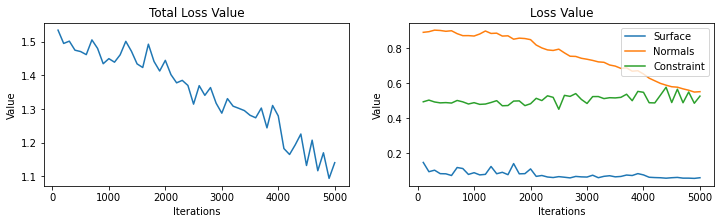

In [ ]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' +  distribution_name + '_' + constraint_name + '_' + network_ver + '.npy'
model, optimizer, scheduler = IGR.train(iteration,
                             model,
                             optimizer,
                             scheduler,
                             batch_size=None,
                             points=dataset,
                             normal_vectors=normal_vectors,
                             loss_output_path=outfile,
                             device=device)

In [ ]:
save_path = mp + '/models/' + dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '_' + network_ver + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [ ]:
xx, yy= Visualization.grid_from_torch(dataset, resx=50, resy=50, device=device)

In [ ]:
# constraint_output = 'constraint_' + dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '_' + network_ver + '.csv'
constraint_output = None
vtk_output_path = None
z = Visualization.nn_sampling(model, xx, yy, 
                              constraint_output=constraint_output,
                              vtk_output_path = vtk_output_path,
                              device=device)

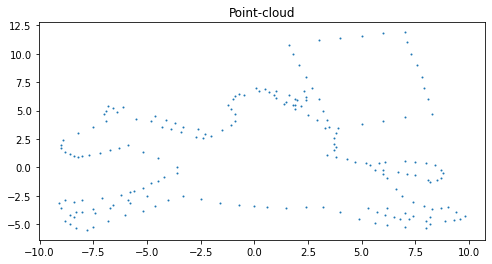

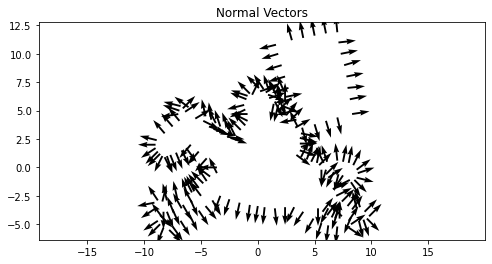

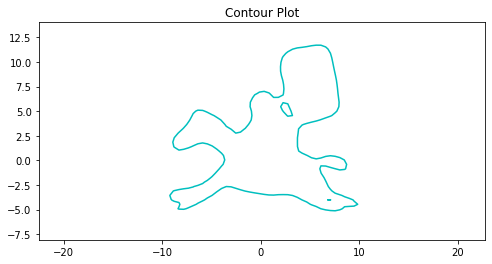

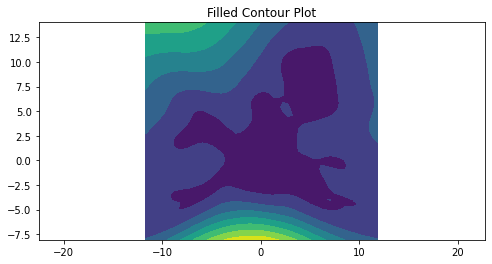

In [ ]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=True, surface=True, filled_contour=True)